In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

# STATISTICS

In [2]:
#offense, defense, and special teams groups
offense_pos = ["QB", "RB", "FB", "WR", "TE", "OT", "OG", "C", "OL"]
defense_pos = ["DE", "DT", "DE/DT", "LB", "CB", "S", "DB"]
sp_teams_pos = ["K", "P"]

arrest_data = pd.read_csv('Resources/ArrestIncidents.csv')
arrest_data["YEAR"] = arrest_data["DATE"].str[-4:]

arrest_data.head()

,DATE,TEAM,NAME,POSITION,CASE,CATEGORY,DESCRIPTION,OUTCOME,YEAR
0,3/27/2017,SEA,Trevone Boykin,QB,Arrested,Drugs,"Accused of marijuana possession, public intoxi...",Resolution undetermined.,2017
1,3/26/2017,CHI,Deiondre Hall,CB,Arrested,Disorderly conduct,"Accused of disorderly conduct, public intoxica...",Resolution undetermined.,2017
2,3/26/2017,GB,Makinton Dorleant,CB,Arrested,Police interference,Accused of interfence after scuffle outside of...,Resolution undetermined.,2017
3,3/7/2017,KC,Demetrius Harris,TE,Arrested,Drugs,Suspected of felony marijuana possession as pa...,Resolution undetermined.,2017
4,3/5/2017,LAR,Ethan Westbrooks,DT,Arrested,Domestic violence,Suspected of domestic violence in Sacramento a...,Resolution undetermined.,2017


In [3]:
# Get the number of arrestation by team
#Grab the Data
team_count = arrest_data["TEAM"].value_counts()
team_count
# Get the number of arrestation by team
Team_arrestation = team_count.reset_index()
Team_arrestation_list = Team_arrestation.values.tolist()
print(Team_arrestation_list)


[['MIN', 49], ['DEN', 47], ['CIN', 44], ['TEN', 36], ['TB', 36], ['IND', 35], ['JAC', 34], ['CLE', 33], ['KC', 32], ['CHI', 32], ['MIA', 31], ['BAL', 27], ['SEA', 26], ['SD', 26], ['NO', 25], ['SF', 24], ['PIT', 24], ['GB', 23], ['ARI', 21], ['OAK', 21], ['CAR', 21], ['WAS', 21], ['ATL', 20], ['NYJ', 20], ['NE', 20], ['BUF', 19], ['DET', 18], ['PHI', 18], ['DAL', 17], ['NYG', 16], ['HOU', 13], ['STL', 12], ['LAR', 5], ['Free agent', 3], ['LAC', 1]]


In [4]:
# Measures of central tendancy of arrestation per year
# Retrieve Data
arrests_each_year = arrest_data["YEAR"].value_counts()
arrests_each_year
# Determine the measures of central tendancy 
arrest_average = arrests_each_year.mean()
arrest_mode = arrests_each_year.mode()
arrest_median = arrests_each_year.median()

print(f"The average of arrestation per year is {arrest_average}")
print(f"The mode of arrestation per year is {arrest_mode}")
print(f"The median of arrestation per year is {arrest_median}")

The average of arrestation per year is 47.22222222222222
The mode of arrestation per year is 0    39
1    43
2    48
Name: count, dtype: int64
The median of arrestation per year is 47.5


In [5]:
# Determine measure of central tendency of arrestation by team 
# Retrieve the data
team_count = arrest_data["TEAM"].value_counts()
team_count
# Calculate the different measures
Team_arrestation = team_count.reset_index(name ="number of arrestation")
Team_arrestation_average = Team_arrestation['number of arrestation'].mean() 
Team_arrestation_median = Team_arrestation['number of arrestation'].median()
Team_arrestation_mode = Team_arrestation['number of arrestation'].mode()
print(f"The mean of arrestation by team  is:{Team_arrestation_average}")
print(f"The median of arrestation by team is:{Team_arrestation_median}")
print(f"The mode of arrestation by team is :{Team_arrestation_mode}")

The mean of arrestation by team  is:24.285714285714285
The median of arrestation by team is:23.0
The mode of arrestation by team is :0    21
Name: number of arrestation, dtype: int64


In [6]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(Team_arrestation['number of arrestation'],ddof = 0)
print(f"The team arrestation variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(Team_arrestation['number of arrestation'],ddof = 0)
print(f"The team arrestation standard deviation using the NumPy module is {sd_numpy}")

The team arrestation variance using the NumPy module is 120.7755102040816
The team arrestation standard deviation using the NumPy module is 10.989791181095372


In [7]:
#According to the top 5 category of arrestation, finds the measure of central tendancy by year
# Top 5 = [DUI,Drugs, Domestic Violence, Assault, Disorderly conduct]
#The mean of arrestation for the Top 5
dui_year = arrest_data.loc[arrest_data["CATEGORY"] == "DUI", :]["YEAR"].value_counts()
drugs_year = arrest_data.loc[arrest_data["CATEGORY"] == "Drugs", :]["YEAR"].value_counts()
dv_year = arrest_data.loc[arrest_data["CATEGORY"] == "Domestic violence", :]["YEAR"].value_counts()
assault_year = arrest_data.loc[arrest_data["CATEGORY"] == "Assault", :]["YEAR"].value_counts()
disorderly_conduct_year = arrest_data.loc[arrest_data["CATEGORY"] == "Disorderly conduct", :]["YEAR"].value_counts()

print(f"The average of arrestation for DUI by year is:{dui_year.mean()}")
print(f"The average of arrestation for Drugs by year is:{drugs_year.mean()}")
print(f"The average of arrestation for Domestic violence by year  is:{dv_year.mean()}")
print(f"The average of arrestation for assault by year is:{assault_year.mean()}")
print(f"The average of arrestation for Disorderly conduct by year  is:{disorderly_conduct_year.mean()}")


The average of arrestation for DUI by year is:12.647058823529411
The average of arrestation for Drugs by year is:5.5
The average of arrestation for Domestic violence by year  is:5.222222222222222
The average of arrestation for assault by year is:3.9444444444444446
The average of arrestation for Disorderly conduct by year  is:2.8666666666666667


In [8]:
# Average of the top 5 arrsestation [DUI, Drugs, Domestic Violence, Assault and Disorderly conduct] by team
dui_team = arrest_data.loc[arrest_data["CATEGORY"] == "DUI", :]["TEAM"].value_counts()
drugs_team = arrest_data.loc[arrest_data["CATEGORY"] == "Drugs", :]["TEAM"].value_counts()
dv_team = arrest_data.loc[arrest_data["CATEGORY"] == "Domestic violence", :]["TEAM"].value_counts()
assault_team = arrest_data.loc[arrest_data["CATEGORY"] == "Assault", :]["TEAM"].value_counts()
disorderly_conduct_team = arrest_data.loc[arrest_data["CATEGORY"] == "Disorderly conduct", :]["TEAM"].value_counts()
print(f"The average of arrestation for DUI by team is:{dui_team.mean()}")
print(f"The average of arrestation for Drugs by team is:{drugs_team.mean()}")
print(f"The average of arrestation for Domestic violence by team  is:{dv_team.mean()}")
print(f"The average of arrestation for assault by team is:{assault_year.mean()}")
print(f"The average of arrestation for Disorderly conduct by team  is:{disorderly_conduct_team.mean()}")

The average of arrestation for DUI by team is:6.71875
The average of arrestation for Drugs by team is:3.193548387096774
The average of arrestation for Domestic violence by team  is:3.1333333333333333
The average of arrestation for assault by team is:3.9444444444444446
The average of arrestation for Disorderly conduct by team  is:1.9545454545454546


In [9]:
# How many players have been charged for DUI
dui_case = arrest_data.loc[arrest_data["CATEGORY"] == "DUI", :]["CASE"].value_counts()
dui_case
# How many players have been charged for Drogs
drugs_case = arrest_data.loc[arrest_data["CATEGORY"] == "Drugs", :]["CASE"].value_counts()
drugs_case
# Determine how many players have been charged for domestic violence 
dv_case = arrest_data.loc[arrest_data["CATEGORY"] == "Domestic violence", :]["CASE"].value_counts()
dv_case
# Determine how many players have been charged for assault 
assault_case = arrest_data.loc[arrest_data["CATEGORY"] == "Assault", :]["CASE"].value_counts()
assault_case
# Determine how many players have been charged for Disorderly conduct 
disorderly_case = arrest_data.loc[arrest_data["CATEGORY"] == "Disorderly conduct", :]["CASE"].value_counts()
disorderly_case
# Create a dataframe
case_charged = pd.DataFrame({'DUI':dui_case,
                            'Drugs':drugs_case, 
                            'DV':dv_case, 
                            'Assault':assault_case, 
                            'Disorderly':disorderly_case})
case_Charged = case_charged.replace(np.nan,0)
case_Charged

,DUI,Drugs,DV,Assault,Disorderly
CASE,,,,,
Arrested,213.0,76.0,89.0,49.0,40.0
Charged,2.0,6.0,3.0,12.0,1.0
Cited,0.0,11.0,0.0,3.0,2.0
Detained,0.0,1.0,0.0,0.0,0.0
Indicted,0.0,3.0,1.0,0.0,0.0
Summoned,0.0,2.0,0.0,1.0,0.0
Surrendered,0.0,0.0,1.0,4.0,0.0
Warrant,0.0,0.0,0.0,2.0,0.0


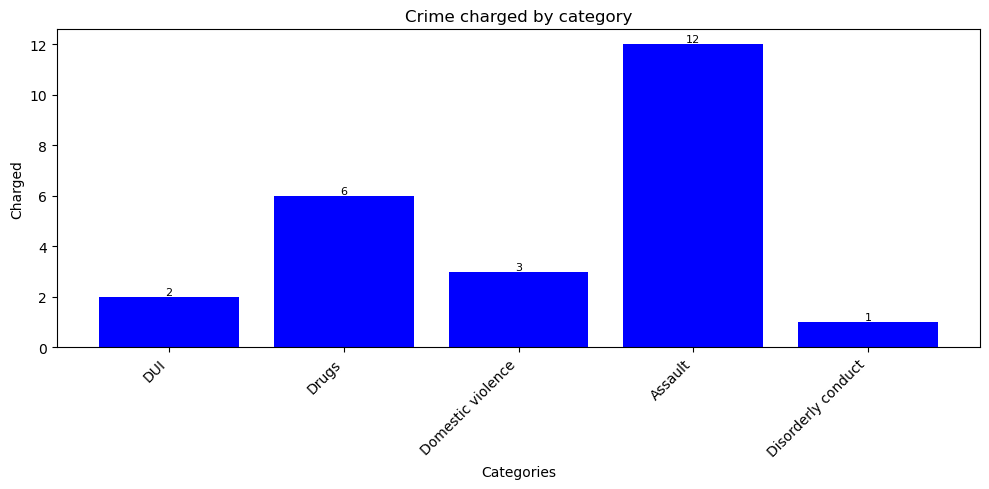

In [10]:
import matplotlib.pyplot as plt


categories = ['DUI', 'Drugs', 'Domestic violence', 'Assault', 'Disorderly conduct']
values = [2, 6, 3, 12, 1]

# Create a bar graph
plt.figure(figsize=(10, 5))
bars = plt.bar(categories, values, color='blue')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Charged')
plt.title('Crime charged by category')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display count values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom', fontsize=8, color='black')

# Show the graph
plt.tight_layout()
plt.show()

In [11]:
# Determine which team the most charged
charged_team = arrest_data.loc[arrest_data["CASE"] == "Charged", :]["TEAM"].value_counts()
print(f"The average of charged by team  is:{charged_team.mean()}")
charged_team.head()

The average of charged by team  is:2.1666666666666665


TEAM
PHI    5
KC     5
MIN    4
BAL    4
NYJ    3
Name: count, dtype: int64

In [12]:
# Count the number of the team im the DataFrame
team_count_number = arrest_data["TEAM"].nunique()
team_count_number

35

In [13]:
offense_arrest_number = arrest_data[arrest_data["POSITION"].isin(offense_pos)==True]["CATEGORY"].count()
offense_arrest_number

385

In [14]:
defense_arrest_number = arrest_data[arrest_data["POSITION"].isin(defense_pos)==True]["CATEGORY"].count()
defense_arrest_number

450

In [15]:
sp_tm_arrest_number = arrest_data[arrest_data["POSITION"].isin(sp_teams_pos)==True]["CATEGORY"].count()
sp_tm_arrest_number

15

In [16]:
# Collected data in of NFL arreatation 850 cases 
# Create the data frame
collected_data = pd.Series([385,450,14], index=["offense", "defense", "sp"])
df = pd.DataFrame([collected_data]).T

In [17]:
# Create the data frame
df = pd.DataFrame([collected_data]).T

In [18]:
# Add a colum for the default value
df[1] = 283

In [19]:
# Rename colums
df.columns = ["collected","expected"]
df

,collected,expected
offense,385,283
defense,450,283
sp,14,283


In [20]:
# The degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [21]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['collected'], df['expected'])

Power_divergenceResult(statistic=391.0035335689046, pvalue=1.2435449356546432e-85)

Conclusion

The chi-square value of 391 exceeds the critical value of 5.99, we conclude that the results are statistically significant.